In [1]:
import pandas as pd
import scipy.sparse

from lightfm import LightFM

In [2]:
df = pd.read_csv('/pio/scratch/1/i313924/data/train_data/slim_ratings.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/slim_interactions.npz')
dataset = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/slim_dataset.pkl')
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [3]:
items = df['asin'].drop_duplicates()
item_mapping = dataset.mapping()[2]
items_categories = categories[categories.asin.isin(items)]

In [4]:
women_ids = items_categories[items_categories['category_1'] == 'Women']['asin'].unique()
women_ids = [item_mapping[id] for id in women_ids]

In [5]:
men_ids = items_categories[items_categories['category_1'] == 'Men']['asin'].unique()
men_ids = [item_mapping[id] for id in men_ids]

In [6]:
model = LightFM(no_components=100, learning_schedule='adadelta', loss='warp', women_ids=women_ids, men_ids=men_ids)

my implementation


In [7]:
model.fit(interactions, verbose=True, epochs=1000, num_threads=8)

Epoch: 100%|██████████| 1000/1000 [39:33<00:00,  2.37s/it]


In [9]:
import pickle

pickle.dump(model, open('/pio/scratch/1/i313924/data/lightfm_data/warp_model_1000_epochs_lr_0.9->0.2.pkl', 'wb'), protocol=4)

In [10]:
with open('/pio/scratch/1/i313924/data/lightfm_data/num_regularized_ids', 'r') as f_in:
    content = list(map(int, f_in.read().split()))

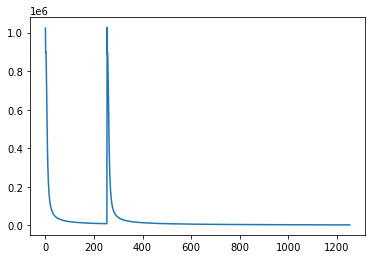

In [11]:
import matplotlib.pyplot as plt
plt.plot(content)